# SEMMA (Sample, Explore, Modify, Model, Assess) Process
SEMMA is a methodology developed by SAS Institute for data mining. The process can be described as:

**Sample**: Drawing a sample from a large dataset.

**Explore**: Exploring the data to better understand its structure and the underlying relationships between variables.

**Modify**: Preprocessing and transforming the data to better fit the modeling tools.

**Model**: Applying data mining algorithms to model the data.

**Assess**: Evaluating the model's performance

## Dataset for SEMMA

For the SEMMA process, I recommend using the "Heart Disease UCI" dataset available on Kaggle. This dataset contains 13 attributes and aims to predict the presence of heart disease in the patient. You can find the dataset here.


In [1]:
# Loading the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming the dataset has been uploaded with the name "heart_disease.csv"
data = pd.read_csv("heart_disease.csv")

# Initial exploration
print(data.head())

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   69    1   0       160   234    1        2      131      0      0.1      1   
1   69    0   0       140   239    0        0      151      0      1.8      0   
2   66    0   0       150   226    0        0      114      0      2.6      2   
3   65    1   0       138   282    1        2      174      0      1.4      1   
4   64    1   0       110   211    0        2      144      1      1.8      1   

   ca  thal  condition  
0   1     0          0  
1   2     0          0  
2   0     0          0  
3   1     0          1  
4   0     0          0  


Exploring the dataset

Let's visualize the distribution of the target variable and the correlations between variables.

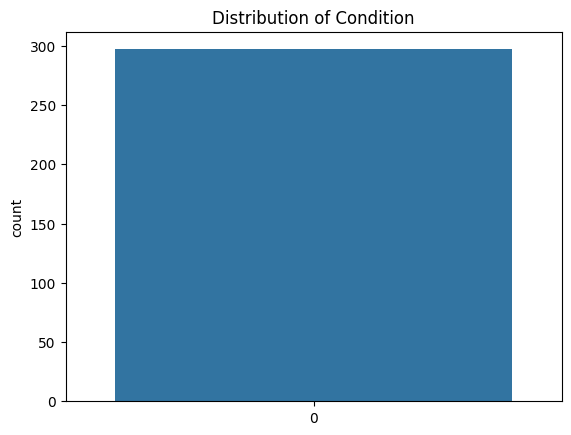

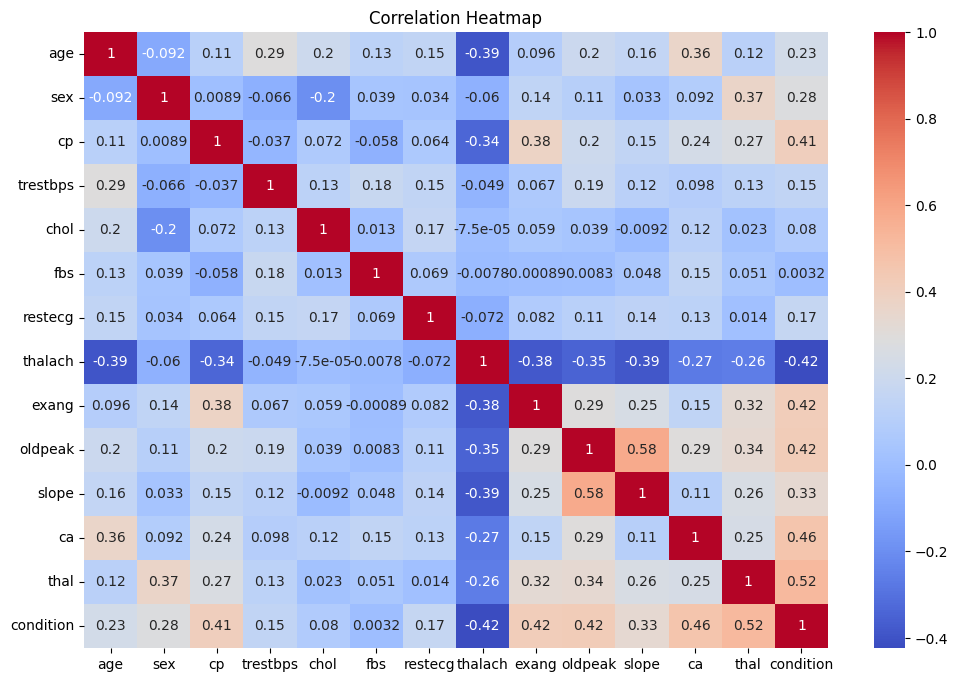

In [3]:
# Distribution of target variable
sns.countplot(data['condition'])
plt.title('Distribution of Condition')
plt.show()

# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


##Modifying the dataset

In [4]:
# Handling missing values
data.fillna(data.mean(), inplace=True)  # Filling missing values with mean for simplicity

# Standardizing the dataset
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data.drop('condition', axis=1))
scaled_data = pd.DataFrame(scaled_data, columns=data.columns[:-1])
scaled_data['condition'] = data['condition']


## Modelling the dataset

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Splitting data
X = scaled_data.drop("condition", axis=1)
y = scaled_data["condition"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Logistic Regression
model = LogisticRegression()
model.fit(X_train, y_train)
predictions = model.predict(X_test)


##Assessing the model

In [6]:
from sklearn.metrics import classification_report, accuracy_score

# Evaluating the model's performance
print("Accuracy:", accuracy_score(y_test, predictions))
print(classification_report(y_test, predictions))


Accuracy: 0.7333333333333333
              precision    recall  f1-score   support

           0       0.77      0.72      0.74        32
           1       0.70      0.75      0.72        28

    accuracy                           0.73        60
   macro avg       0.73      0.73      0.73        60
weighted avg       0.74      0.73      0.73        60



##Plotting the dataset

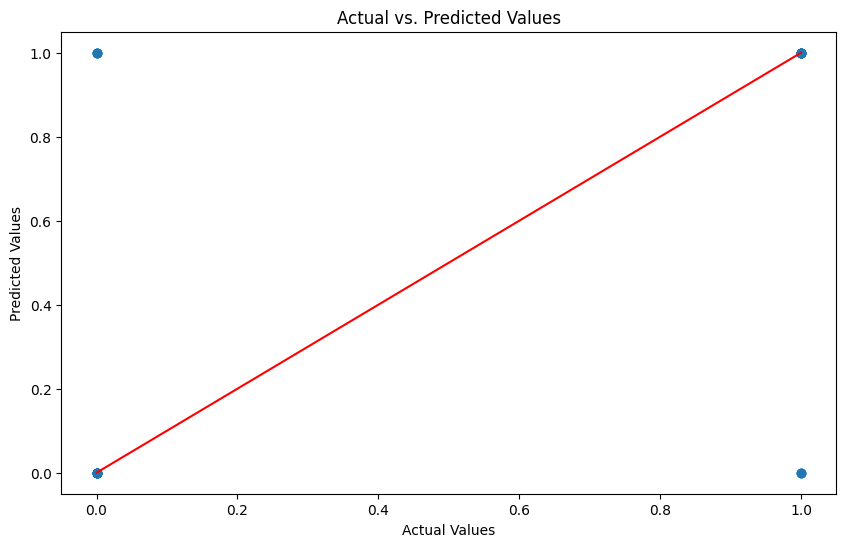

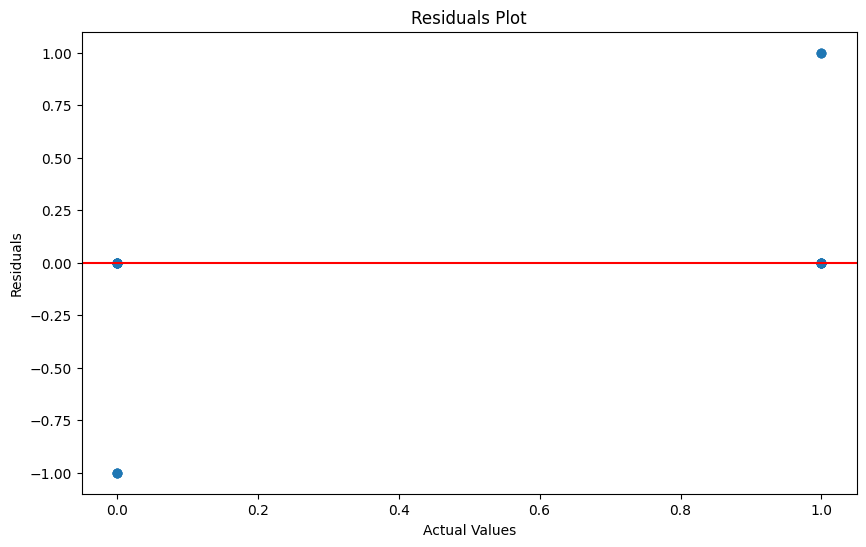

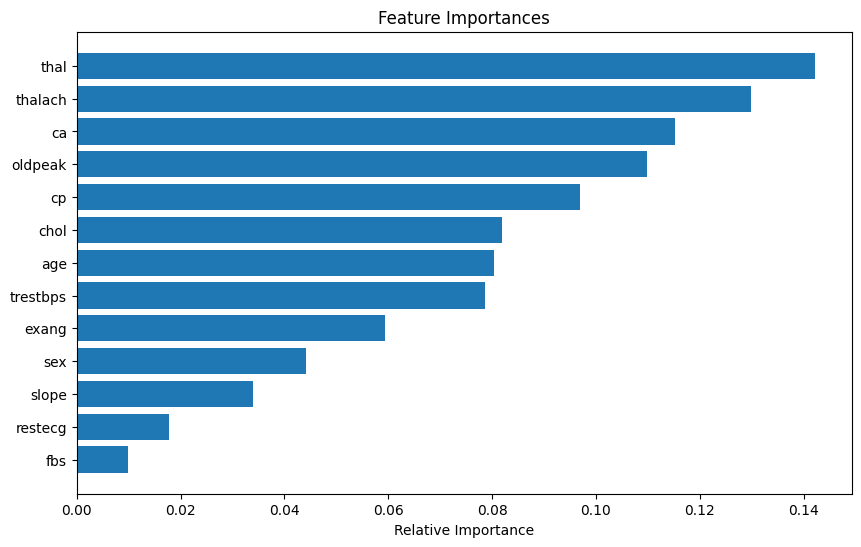

In [7]:
import matplotlib.pyplot as plt

# 1. Actual vs. Predicted Values Scatter Plot
plt.figure(figsize=(10,6))
plt.scatter(y_test, predictions, alpha=0.5)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')  # Line showing perfect prediction
plt.show()

# 2. Residuals Plot
residuals = y_test - predictions
plt.figure(figsize=(10,6))
plt.scatter(y_test, residuals, alpha=0.5)
plt.xlabel('Actual Values')
plt.ylabel('Residuals')
plt.title('Residuals Plot')
plt.axhline(y=0, color='red')
plt.show()

# 3. Feature Importance Plot using Random Forest
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
importances = rf.feature_importances_
indices = np.argsort(importances)
plt.figure(figsize=(10,6))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], align='center')
plt.yticks(range(len(indices)), [X.columns[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()
